In [2]:
pip install mlxtend

Question: Prepare rules for the all the data sets 

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
warnings.filterwarnings("ignore")

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 96F3-7600

 Directory of C:\Users\Beauty\Documents\ExcelR\Assignments\A_9_Association_rules

14-07-2022  12:26    <DIR>          .
14-07-2022  12:26    <DIR>          ..
03-07-2022  14:39    <DIR>          .ipynb_checkpoints
14-07-2022  12:26           183,155 assignment9_association_rules.ipynb
02-07-2022  09:20            46,094 book.csv
02-07-2022  09:20               767 my_movies.csv
02-07-2022  09:20               274 Problem_Statment.txt
               4 File(s)        230,290 bytes
               3 Dir(s)  119,638,601,728 bytes free


# Books data

In [5]:
books=pd.read_csv("book.csv")
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [6]:
books.shape

(2000, 11)

In [7]:
books.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [8]:
# Here all the data is in the form of binary data, hence there is no need for transformation

In [9]:
for i in books.columns:
    print(i)
    print(books[i].value_counts())
    print("======================")

ChildBks
0    1154
1     846
Name: ChildBks, dtype: int64
YouthBks
0    1505
1     495
Name: YouthBks, dtype: int64
CookBks
0    1138
1     862
Name: CookBks, dtype: int64
DoItYBks
0    1436
1     564
Name: DoItYBks, dtype: int64
RefBks
0    1571
1     429
Name: RefBks, dtype: int64
ArtBks
0    1518
1     482
Name: ArtBks, dtype: int64
GeogBks
0    1448
1     552
Name: GeogBks, dtype: int64
ItalCook
0    1773
1     227
Name: ItalCook, dtype: int64
ItalAtlas
0    1926
1      74
Name: ItalAtlas, dtype: int64
ItalArt
0    1903
1      97
Name: ItalArt, dtype: int64
Florence
0    1783
1     217
Name: Florence, dtype: int64


# 1. For mininum support of 10% and confidence 80%

In [46]:
# Apriori Algorithm
frequent_itemsets1=apriori(books,min_support=0.1,use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [40]:
# Confidence= 80%
rules1=association_rules(frequent_itemsets,metric='confidence',min_threshold=0.8)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
2,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
3,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
4,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
5,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812


In [41]:
rules1.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
3,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
4,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
5,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812
2,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
1,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083


In [42]:
rules1[rules1['confidence']>0.8]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
2,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
3,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
4,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
5,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812


# Visualizing results

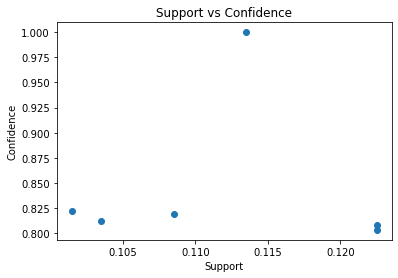

In [43]:
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

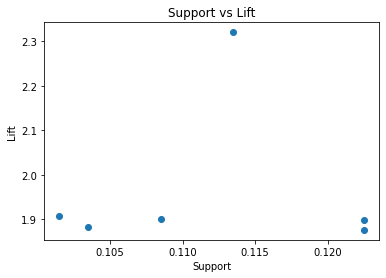

In [44]:
plt.scatter(rules1['support'],rules1['lift'])
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.show()

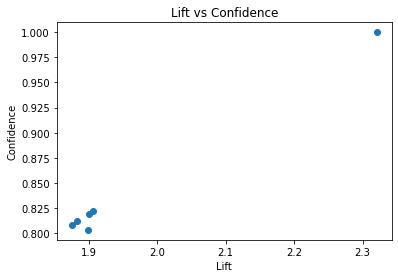

In [45]:
plt.scatter(rules1['lift'],rules1['confidence'])
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')
plt.show()

# 2. For support of 20% and confidence of 70%

In [15]:
frequent_itemsets2=apriori(books,min_support=0.2,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [16]:
rules2=association_rules(frequent_itemsets2,metric='confidence',min_threshold=0.7)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [17]:
# No such rules for which support is 20% and confidence is 70%

# 3. For support of 20% and confidence of 60%

In [18]:
frequent_itemsets3=apriori(books,min_support=0.2,use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [19]:
rules3=association_rules(frequent_itemsets3,metric='confidence',min_threshold=0.6)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124


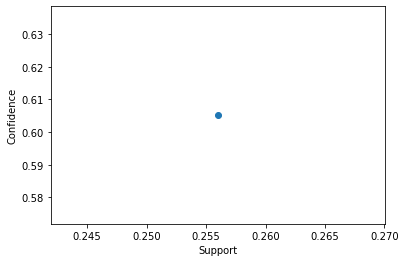

In [20]:
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# 4. For support of 10% and confidence 50%

In [21]:
frequent_itemsets4=apriori(books,min_support=0.1,use_colnames=True)
frequent_itemsets4

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [22]:
rules4=association_rules(frequent_itemsets4,metric='confidence',min_threshold=0.5)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
5,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
6,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
7,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
8,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
9,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556


In [23]:
rules4.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
41,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159
43,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354
47,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
25,"(RefBks, ChildBks)",(CookBks),0.1515,0.4310,0.1225,0.808581,1.876058,0.057204,2.972534
24,"(RefBks, CookBks)",(ChildBks),0.1525,0.4230,0.1225,0.803279,1.899004,0.057993,2.933083
38,"(GeogBks, ArtBks)",(ChildBks),0.1275,0.4230,0.1020,0.800000,1.891253,0.048067,2.885000
16,"(YouthBks, CookBks)",(ChildBks),0.1620,0.4230,0.1290,0.796296,1.882497,0.060474,2.832545
21,"(DoItYBks, ChildBks)",(CookBks),0.1840,0.4310,0.1460,0.793478,1.841017,0.066696,2.755158
34,"(GeogBks, DoItYBks)",(ChildBks),0.1325,0.4230,0.1045,0.788679,1.864490,0.048452,2.730446


In [24]:
rules4[rules4['confidence']>0.8]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
24,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
25,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
41,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
43,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
47,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812


# Visualizing results

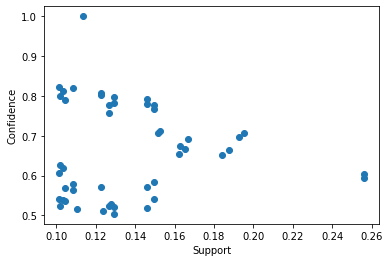

In [25]:
plt.scatter(rules4['support'],rules4['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

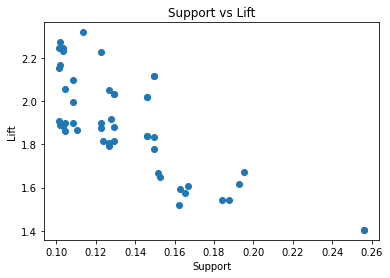

In [38]:
plt.scatter(rules4['support'],rules4['lift'])
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.show()

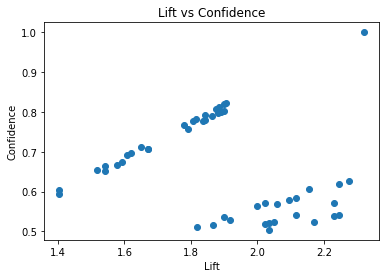

In [39]:
plt.scatter(rules4['lift'],rules4['confidence'])
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')
plt.show()

# 5. For support 5% and confidence 80%

In [26]:
frequent_itemsets5=apriori(books,min_support=0.05,use_colnames=True)
frequent_itemsets5

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(GeogBks, YouthBks, CookBks, DoItYBks)"
96,0.0560,"(GeogBks, YouthBks, CookBks, ArtBks)"
97,0.0650,"(GeogBks, DoItYBks, CookBks, ArtBks)"
98,0.0510,"(YouthBks, ChildBks, DoItYBks, GeogBks, CookBks)"


In [27]:
rules5=association_rules(frequent_itemsets5,metric='confidence',min_threshold=0.8)
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(YouthBks, DoItYBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902
2,"(RefBks, YouthBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
3,"(GeogBks, YouthBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884
4,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
...,...,...,...,...,...,...,...,...,...
57,"(GeogBks, DoItYBks, ArtBks)",(CookBks),0.0730,0.431,0.0650,0.890411,2.065919,0.033537,5.192125
58,"(GeogBks, YouthBks, ChildBks, DoItYBks)",(CookBks),0.0565,0.431,0.0510,0.902655,2.094327,0.026648,5.845182
59,"(GeogBks, YouthBks, CookBks, DoItYBks)",(ChildBks),0.0600,0.423,0.0510,0.850000,2.009456,0.025620,3.846667
60,"(GeogBks, DoItYBks, ChildBks, ArtBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583


In [28]:
rules5.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
6,"(ItalCook, ChildBks)",(CookBks),0.0850,0.431,0.0850,1.000000,2.320186,0.048365,inf
23,"(GeogBks, ItalCook)",(CookBks),0.0640,0.431,0.0640,1.000000,2.320186,0.036416,inf
22,"(ItalCook, ArtBks)",(CookBks),0.0565,0.431,0.0565,1.000000,2.320186,0.032148,inf
19,"(DoItYBks, ItalCook)",(CookBks),0.0585,0.431,0.0585,1.000000,2.320186,0.033287,inf
...,...,...,...,...,...,...,...,...,...
4,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
12,"(RefBks, YouthBks)",(CookBks),0.0965,0.431,0.0775,0.803109,1.863362,0.035908,2.889921
44,"(RefBks, ChildBks, ArtBks)",(CookBks),0.0760,0.431,0.0610,0.802632,1.862254,0.028244,2.882933
13,"(YouthBks, ArtBks)",(CookBks),0.1010,0.431,0.0810,0.801980,1.860743,0.037469,2.873450


# Visualizing results

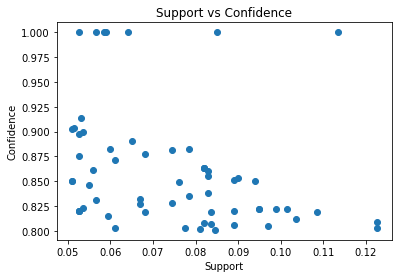

In [81]:
plt.scatter(rules5['support'],rules5['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

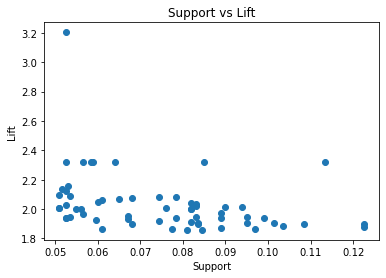

In [47]:
plt.scatter(rules5['support'],rules5['lift'])
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.show()

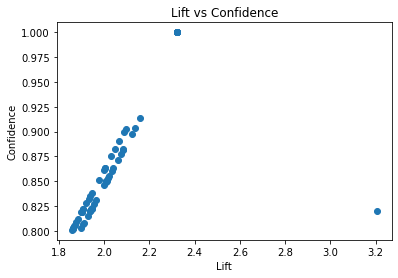

In [48]:
plt.scatter(rules5['lift'],rules5['confidence'])
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')
plt.show()

# Movies data

In [67]:
movies=pd.read_csv("my_movies.csv")

In [68]:
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [71]:
df=movies.iloc[:,5:]

In [72]:
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


# 1. Support 5% and Confidence 80%

In [73]:
freq_itemsets1=apriori(df,min_support=0.05,use_colnames=True)
freq_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [74]:
rules_1=association_rules(freq_itemsets1,metric='confidence',min_threshold=0.8)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
...,...,...,...,...,...,...,...,...,...
123,"(Harry Potter1, LOTR2)","(Green Mile, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
124,"(Harry Potter1, LOTR1)","(Green Mile, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
125,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
126,"(LOTR2, Sixth Sense)","(Harry Potter1, Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [75]:
rules_1.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
127,"(LOTR1, Sixth Sense)","(Harry Potter1, Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
103,"(Green Mile, LOTR1)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
101,"(Harry Potter1, LOTR1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
65,"(Harry Potter1, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
94,"(Green Mile, LOTR2)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
6,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
5,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
12,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


In [76]:
rules_1[rules_1['confidence']==1].shape

(125, 9)

# Visualizing results

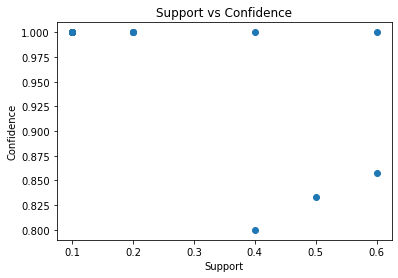

In [78]:
plt.scatter(rules_1['support'],rules_1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

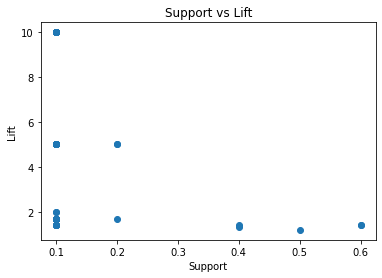

In [80]:
plt.scatter(rules_1['support'],rules_1['lift'])
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.show()

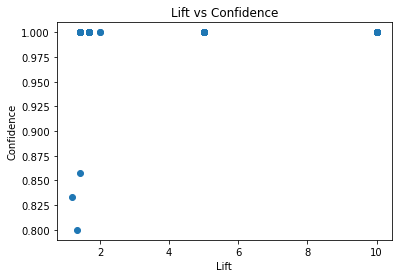

In [82]:
plt.scatter(rules_1['lift'],rules_1['confidence'])
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')
plt.show()

# 2. Support 5% and Confidence 70%

In [84]:
freq_itemsets2=apriori(df,min_support=0.05,use_colnames=True)
freq_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [85]:
rules_2=association_rules(freq_itemsets2,metric='confidence',min_threshold=0.7)
rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
...,...,...,...,...,...,...,...,...,...
124,"(Harry Potter1, LOTR2)","(Green Mile, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
125,"(Harry Potter1, LOTR1)","(Green Mile, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
126,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
127,"(LOTR2, Sixth Sense)","(Harry Potter1, Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


# Visualizing results

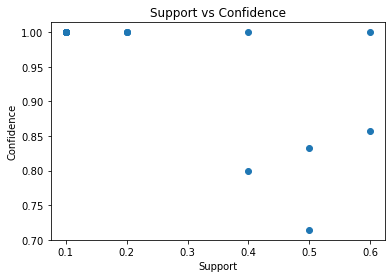

In [86]:
plt.scatter(rules_2['support'],rules_2['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

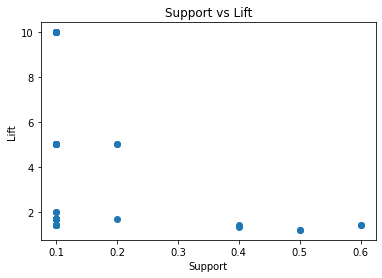

In [87]:
plt.scatter(rules_2['support'],rules_2['lift'])
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.show()

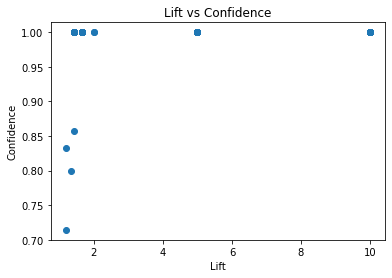

In [88]:
plt.scatter(rules_2['lift'],rules_2['confidence'])
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')
plt.show()

# 3. Support 5% and Confidence 50%

In [89]:
freq_itemsets3=apriori(df,min_support=0.05,use_colnames=True)
freq_itemsets3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [91]:
rules_3=association_rules(freq_itemsets3,metric='confidence',min_threshold=0.5)
rules_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
211,"(LOTR1, Sixth Sense)","(Harry Potter1, Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
212,(Green Mile),"(Harry Potter1, LOTR2, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
213,(Harry Potter1),"(Green Mile, LOTR1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(LOTR2),"(Harry Potter1, Green Mile, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


# Visualizing Results

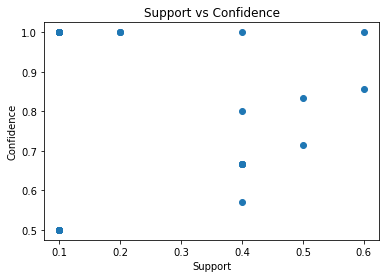

In [92]:
plt.scatter(rules_3['support'],rules_3['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

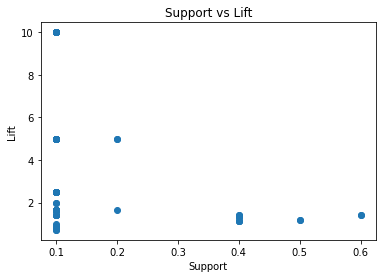

In [93]:
plt.scatter(rules_3['support'],rules_3['lift'])
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.show()

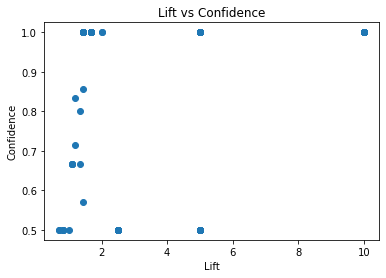

In [94]:
plt.scatter(rules_3['lift'],rules_3['confidence'])
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')
plt.show()

# 4. Support 10% Confidence 80%

In [95]:
freq_itemsets4=apriori(df,min_support=0.1,use_colnames=True)
freq_itemsets4

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [96]:
rules_4=association_rules(freq_itemsets4,metric='confidence',min_threshold=0.8)
rules_4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
...,...,...,...,...,...,...,...,...,...
123,"(Harry Potter1, LOTR2)","(Green Mile, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
124,"(Harry Potter1, LOTR1)","(Green Mile, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
125,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
126,"(LOTR2, Sixth Sense)","(Harry Potter1, Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


# Visualizing results

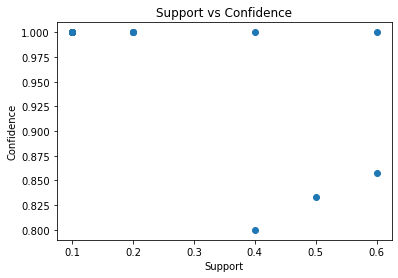

In [97]:
plt.scatter(rules_4['support'],rules_4['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

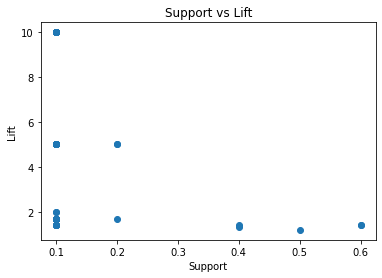

In [98]:
plt.scatter(rules_4['support'],rules_4['lift'])
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.show()

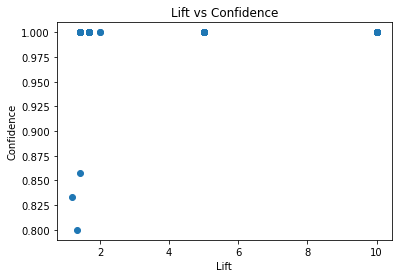

In [99]:
plt.scatter(rules_4['lift'],rules_4['confidence'])
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')
plt.show()

# 5. Support 10% Confidence 60%

In [101]:
freq_itemsets5=apriori(df,min_support=0.1,use_colnames=True)
freq_itemsets5

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [102]:
rules_5=association_rules(freq_itemsets5,metric='confidence',min_threshold=0.6)
rules_5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
129,"(Harry Potter1, LOTR2)","(Green Mile, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
130,"(Harry Potter1, LOTR1)","(Green Mile, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
131,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
132,"(LOTR2, Sixth Sense)","(Harry Potter1, Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


# Visualizing results

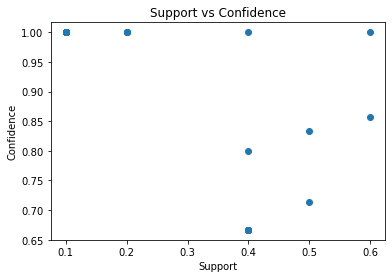

In [103]:
plt.scatter(rules_5['support'],rules_5['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

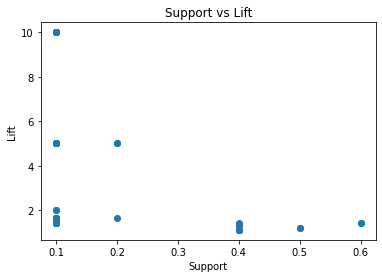

In [104]:
plt.scatter(rules_5['support'],rules_5['lift'])
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.show()

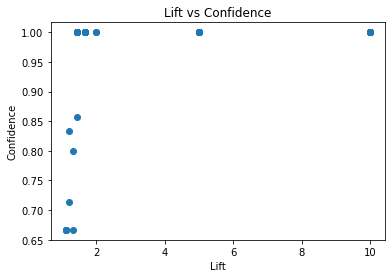

In [105]:
plt.scatter(rules_5['lift'],rules_5['confidence'])
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')
plt.show()